# **A Homogeneous Main-Sequence Model: Lembar Kerja 2**
---

Nama: **Sulthon Furqandhani Araska**

NIM: **10321013**

Mata kuliah: **AS3113 Fisika Bintang**

Bab: **Struktur Internal Bintang**

In [ ]:
# @title **Impor Libraries**

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline
from IPython.display import display

def Graph():
  plt.tight_layout()
  plt.legend()
  plt.grid()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Parameter Fisis Interior Bintang terhadap Radius**

,r,Qm,L_r,T,P,rho,kap,eps,Zone,d(lnP)/d(lnT)
0,71100000000,0.000000e+00,3.290000e+33,0,0.000000e+00,0.000000e+00,0.00,0.000000e+00,r,4.3
1,71000000000,3.940000e-14,3.290000e+33,3290,7.970000e+00,1.750000e-11,230.00,1.670000e-102,r,4.3
2,70900000000,6.080000e-13,3.290000e+33,6580,2.260000e+02,2.520000e-10,172.00,3.790000e-81,r,4.8
3,70800000000,1.180000e-11,3.290000e+33,13200,6.640000e+03,3.720000e-09,130.00,5.650000e-64,r,4.8
4,70800000000,3.400000e-12,3.290000e+33,9880,1.660000e+03,1.240000e-09,148.00,1.200000e-70,r,4.9
...,...,...,...,...,...,...,...,...,...,...
419,4190000000,9.880000e-01,5.510000e+32,13500000,1.320000e+17,7.310000e+01,1.49,1.210000e+01,c,2.5
420,3480000000,9.930000e-01,4.280000e+32,13700000,1.360000e+17,7.450000e+01,1.46,1.310000e+01,c,2.5
421,2770000000,9.970000e-01,3.400000e+32,13800000,1.400000e+17,7.570000e+01,1.44,1.390000e+01,c,2.5
422,2060000000,9.990000e-01,2.830000e+32,13900000,1.430000e+17,7.660000e+01,1.42,1.460000e+01,c,2.5


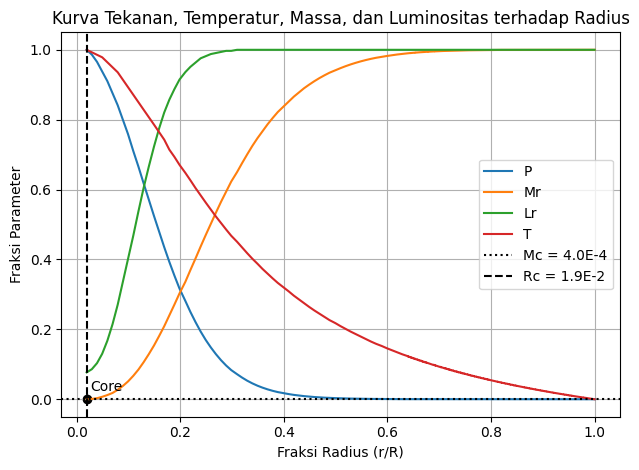

In [ ]:
# @title **Struktur Bintang**

# Dataframe
df1 = pd.read_excel('starmodl.xlsx')
display(df1)

# Extract necessary values from dataframe
r    = df1['r'].values
Qm   = df1['Qm'].values
Lr   = df1['L_r'].values
T    = df1['T'].values
P    = df1['P'].values
Mtot = 1.989E+33

# Mass distribution:
Mr = []
for i in range (len(Qm)):
  dM = Mtot*(1-Qm[i])
  Mr.append(dM)

# Temperature gradient:
Grad_T = []
for i in range (len(Qm)):
  dT = T[i]/r[i]
  Grad_T.append(dT)

# Define plot function
def Plot(y, a):
  x = r/np.max(r)
  y = y/np.max(y)
  plt.plot(x, y, label=a)

# Graphic plotting
Plot(P, 'P')
Plot(Mr,'Mr')
Plot(Lr,'Lr')
Plot(T, 'T')

#Stellar core
plt.axhline(4.00418E-4, color='k', linestyle=':',  label='Mc = 4.0E-4')
plt.axvline(1.9E-2,     color='k', linestyle='--', label='Rc = 1.9E-2')
plt.scatter(1.9E-2, 4.00418E-04, color='k')
plt.text(0.025, 0.025, 'Core')

# Miscellaneous
plt.title('Kurva Tekanan, Temperatur, Massa, dan Luminositas terhadap Radius')
plt.xlabel('Fraksi Radius (r/R)')
plt.ylabel('Fraksi Parameter')
Graph()

## **2. Inti Bintang & Relasi-Massa Luminositas**

In [ ]:
# @title **Data Inti Bintang untuk berbagai Massa**
df2 = pd.DataFrame({
    'M (M⊙)'      :[0.75,   1.00,   1.50,   3.00,    5.00,    8.00,    10.00],
    'L (L⊙)'      :[0.189,  0.859,  6.408,  113.5,   745.7,   3409.0,  6607.0],
    'Te (K)'       :[3788.5, 5402.0, 8644.6, 14671.0, 20069.0, 25366.5, 27933.0],
    'Tc (K)'       :[1.17E7, 1.46E7, 1.98E7, 2.34E7,  2.78E7,  3.06E7,  3.18E7],
    'ρc (g/cm³)'   :[69.3,   76.7,   83.1,   35.6,    19.7,    10.3,    7.52],
    'εc (ergs/s/g)':[6.10,   18.5,   182,    854,     7590,    17500,   22400]})

# Extraxting values from dataframe
M  = df2['M (M⊙)'].values
L  = df2['L (L⊙)'].values
Tc = df2['Tc (K)'].values
ρc = df2['ρc (g/cm³)'].values
εc = df2['εc (ergs/s/g)'].values

# Interpolation function
def Itp(X,Y):
  x = np.linspace(X.min(), X.max(), 300)
  spl = make_interp_spline(X, Y, k=3)
  y = spl(x)
  plt.plot(x,y)

df2

,M (M⊙),L (L⊙),Te (K),Tc (K),ρc (g/cm³),εc (ergs/s/g)
0,0.75,0.189,3788.5,11700000.0,69.30,6.1
1,1.00,0.859,5402.0,14600000.0,76.70,18.5
2,1.50,6.408,8644.6,19800000.0,83.10,182.0
3,3.00,113.500,14671.0,23400000.0,35.60,854.0
4,5.00,745.700,20069.0,27800000.0,19.70,7590.0
5,8.00,3409.000,25366.5,30600000.0,10.30,17500.0
6,10.00,6607.000,27933.0,31800000.0,7.52,22400.0


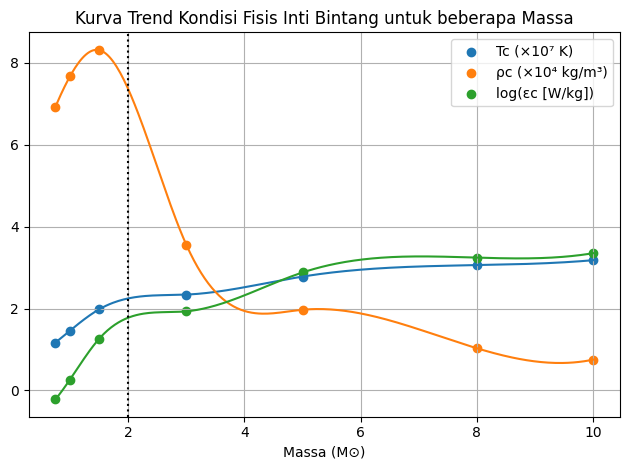

In [ ]:
# @title **a. Plot Kondisi Fisis Inti Bintang untuk Berbagai Massa**

# Scatter Plot
plt.scatter(M, Tc/1e7,           label='Tc (×10⁷ K)')
plt.scatter(M, 0.1*ρc,           label='ρc (×10⁴ kg/m³)')
plt.scatter(M, np.log10(0.1*εc), label='log(εc [W/kg])')

# Interpolation curve
Itp(M, Tc/1e7)
Itp(M, 0.1*ρc)
Itp(M, np.log10(0.1*εc))

# Miscellaneous
plt.axvline(2, color='k', linestyle=':')
plt.title('Kurva Trend Kondisi Fisis Inti Bintang untuk beberapa Massa')
plt.xlabel('Massa (M⊙)')
Graph()

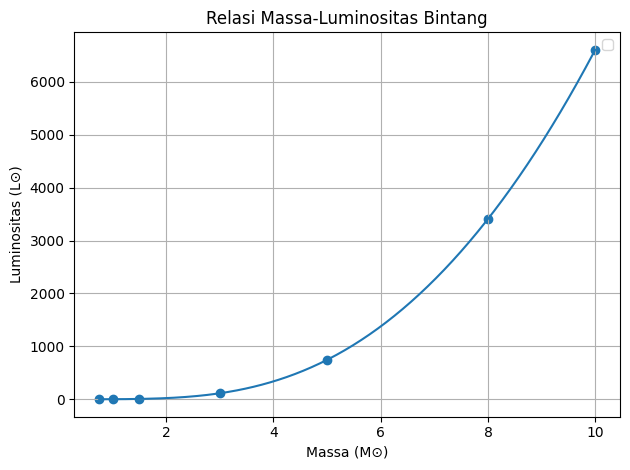

In [ ]:
# @title **b. Plot Mass-Luminositas Bintang**

Itp(M,L)
plt.scatter(M, L)
plt.title('Relasi Massa-Luminositas Bintang')
plt.xlabel('Massa (M⊙)')
plt.ylabel('Luminositas (L⊙)')
Graph()

## **3. Diagram HR Bintang**

In [ ]:
# @title **Data Bintang ZAMS dengan Z=0.01**

df3 = pd.DataFrame({
    'M (M⊙)'      :[0.75,   1.00,   1.50,   3.00,    5.00,    8.00,    10.00],
    'Te (K)'       :[3583.5, 5196.3, 8219.0, 14146.5, 19556.8, 24819.5, 27439.0],
    'L (L⊙)'      :[0.161,  0.760,  5.62,  104.7,   710.0,   3317.0,  6475.0]})
display(df3)

,M (M⊙),Te (K),L (L⊙)
0,0.75,3583.5,0.161
1,1.00,5196.3,0.760
2,1.50,8219.0,5.620
3,3.00,14146.5,104.700
4,5.00,19556.8,710.000
5,8.00,24819.5,3317.000
6,10.00,27439.0,6475.000


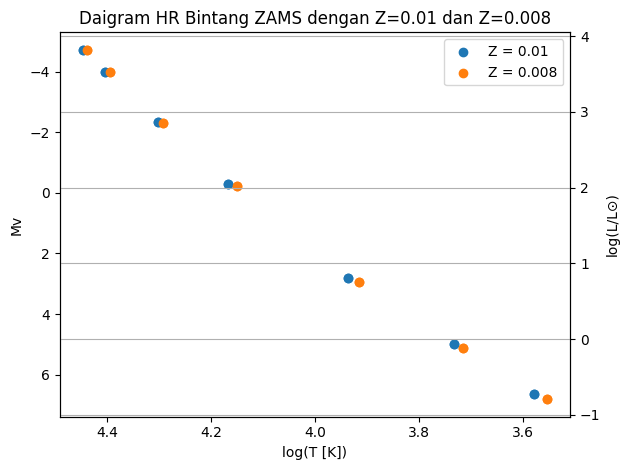

In [ ]:
# @title **Diagram HR Bintang ZAMS**

# Variables
# Effective temperature (logarithmic):
T2  = np.log10(df2['Te (K)'].values)
T3  = np.log10(df3['Te (K)'].values)
# Luminosity:
L2  = df2['L (L⊙)'].values
L3  = df3['L (L⊙)'].values
# Abosulyte visual magnitude:
V2  = 4.83 - 2.5*np.log10(L2)
V3  = 4.83 - 2.5*np.log10(L3)

# Creating double-axes HR Diagram
fig, ax1 = plt.subplots()
# Absolute Magnitude axis
ax1.set_xlabel('log(T [K])')
ax1.set_ylabel('Mv')
ax1.invert_yaxis()
ax1.scatter(T2, V2, label='Z = 0.01')
ax1.scatter(T3, V3, label='Z = 0.008')
# Luminosity axis
ax2 = ax1.twinx()
ax2.set_ylabel('log(L/L⊙)')
ax2.scatter(T2, np.log10(L2), label='Z = 0.01')
ax2.scatter(T3, np.log10(L3), label='Z = 0.008')
# Miscellaneous
plt.gca().invert_xaxis()
plt.title('Daigram HR Bintang ZAMS dengan Z=0.01 dan Z=0.008')
Graph()